<a href="https://colab.research.google.com/github/james-weichert/python-for-ml/blob/main/cs4664_python_for_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://csgrad.cs.vt.edu/assets/logos/vt_inline_ce_computer_science.png" width="50%"/>

# Python for Machine Learning (or "the Data Science Process")
### CS 4664 Spring 2025
Notebook by James Weichert


## Introduction

**Welcome to CS 4664: ML Capstone!** This class provides a hands-on introduction to data science and machine learning. While familiarity with Python programming is a prerequisite for this class, Python programming for ML often requires a different workflow than other programming domains. So it is _extremely_ helpful to become proficient with the **process of working with data**, as well as the tools that facilitate your data science and ML work.

**This lab aims to be an introduction to the fundamentals of working with data in Python for ML contexts,** especially working with `pandas`, one of the key Python libraries used for data science and ML work. Depending on your prior experience, some portion of this notebook may be familiar to you, but some libraries or specific features may not be. That's ok. The notebook is designed to allow you to go at your own pace, and there is (hopefully) enough support structure to guide you through any unfamiliar territory.

**A part II of this lab is in development and will be presented in March.** We will build on the skills you learn here and explore some of the specific ML libraries you plan to use for your capstone project work.

#### Libraries

The following cell has the Python libraries you'll most likely need for assignments throughout the semester. Your final project might require additional libraries. **Make sure to install the necessary libraries,** either on Colab or locally.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn



> **Ex #** indicates a coding exercise you can complete. Click the arrow next to **Ans #** to reveal the corresponding solution.



**Sections**

1. [Understanding Your Data](#1.-Understanding-Your-Data)
2. [Transforming the Data](#2.-Transforming-the-Data)
3. [Graphs](#3.-Graphs)
4. [General Tips](#general-tips)
5. [Helpful Stuff](#helpful-stuff)



---



## 0. Working with `pandas`

`pandas` is a Python library that allows you to structure data as tables (called "dataframes"), keeping everything organized and efficient to find and work with. **`pandas` is the bedrock of machine learning in Python,** because without `pandas` we would be forced to use loose collections of arrays and matrices to store our data (_don't do this!_).

As a data scientist or machine learning practitioner, learning how to use `pandas` (well) is a must! **This section aims to introduce you to the basic functions of pandas that you will use a lot.**

### What are Data?

#### Our Table

Run the cell below to create a table (dataframe) called `my_df`, which contains information about actual animals currently in the [Montgomery County Animal Shelter](https://montva.com/1/departments-services/animal-care-adoption-center). In 99.9% of cases, you will import your data from a `.CSV` file instead of manually entering the information yourself in Python. You will get practice importing a `.CSV` file in Section 1.

In [4]:
my_df = pd.DataFrame({'Name': ['Alfie', 'Babbles', 'Banjo', 'Clay', 'Cookie', 'Milky Way', 'Moondust', 'Oli', 'Sam', 'Pumpkin'],
                      'Dog?': [True, False, True, True, False, False, True, True, True, False],
                      'Breed': ['Labrador Retriever', 'Domestic Short Hair', 'Cattle Dog', 'German Pointer', 'Domestic Short Hair', 'Domestic Short Hair', 'Terrier', 'Beagle', 'Pit Bull', 'Domestic Short Hair'],
                      'Energy': [9, 4, 10, 7, 2, 6, 5, 3, 6, 5],
                      })

,Name,Dog?,Breed,Energy
0,Alfie,True,Labrador Retriever,9
1,Babbles,False,Domestic Short Hair,4
2,Banjo,True,Cattle Dog,10
3,Clay,True,German Pointer,7
4,Cookie,False,Domestic Short Hair,2
5,Milky Way,False,Domestic Short Hair,6
6,Moondust,True,Terrier,5
7,Oli,True,Beagle,3
8,Sam,True,Pit Bull,6
9,Pumpkin,False,Domestic Short Hair,5


#### What Should I Know About My Data?

Now that we've loaded in our data, we can start to get a sense for its size and contents...

In [5]:
my_df.shape

(10, 4)

In [9]:
len(my_df)

10

In [7]:
list(my_df.columns)

['Name', 'Dog?', 'Breed', 'Energy']

In [8]:
my_df.head()

,Name,Dog?,Breed,Energy
0,Alfie,True,Labrador Retriever,9
1,Babbles,False,Domestic Short Hair,4
2,Banjo,True,Cattle Dog,10
3,Clay,True,German Pointer,7
4,Cookie,False,Domestic Short Hair,2


#### What Can I Do with Tables?

The power of `pandas` dataframes comes in how you can use built-in `pandas` functionality to manipulate your data.

**Here are a few things you can do with `pandas` tables:**

##### **Extract a Column**

The syntax `df_name['column_name']` extracts a column of the table by its label. Technically, what is returned is a `Series` object (which is a single-column table)...

In [11]:
my_df['Name']

,Name
0,Alfie
1,Babbles
2,Banjo
3,Clay
4,Cookie
5,Milky Way
6,Moondust
7,Oli
8,Sam
9,Pumpkin


...But in practice it's easier just to think about a `Series` as an array, since they work the same:

In [12]:
for name in my_df['Name']:
  print(name)

Alfie
Babbles
Banjo
Clay
Cookie
Milky Way
Moondust
Oli
Sam
Pumpkin


In [13]:
np.average(my_df['Energy'])

5.7

We can also get a subset of columns using the same indexing process:

In [32]:
my_df[['Name', 'Breed']]

,Name,Breed
0,Alfie,Labrador Retriever
1,Babbles,Domestic Short Hair
2,Banjo,Cattle Dog
3,Clay,German Pointer
4,Cookie,Domestic Short Hair
5,Milky Way,Domestic Short Hair
6,Moondust,Terrier
7,Oli,Beagle
8,Sam,Pit Bull
9,Pumpkin,Domestic Short Hair


##### **Extract a Row**

If you're looking for a particular row of a table (in this case a particular animal), you can extract the information from that row using `df_name.iloc[row_index]`

In [14]:
my_df.iloc[5]

,5
Name,Milky Way
Dog?,False
Breed,Domestic Short Hair
Energy,6


The resulting row can be treated as a small table...

In [15]:
my_df.iloc[5]['Dog?']

False

...or a list (can't be an array if the data types are not all the same)

In [16]:
list(my_df.iloc[5])

['Milky Way', False, 'Domestic Short Hair', 6]

##### **Sort**

Sorting rows in the table by values of a specific column might also be useful...

In [19]:
my_df.sort_values('Energy', ascending = False)

,Name,Dog?,Breed,Energy
2,Banjo,True,Cattle Dog,10
0,Alfie,True,Labrador Retriever,9
3,Clay,True,German Pointer,7
5,Milky Way,False,Domestic Short Hair,6
8,Sam,True,Pit Bull,6
6,Moondust,True,Terrier,5
9,Pumpkin,False,Domestic Short Hair,5
1,Babbles,False,Domestic Short Hair,4
7,Oli,True,Beagle,3
4,Cookie,False,Domestic Short Hair,2


##### **Filter**

A **very** common thing to do with a table is to filter it based on a certain condition. In other words, we want to return a table with only the rows that match a certain condition.

To do this in `pandas`, we first need to create a condition:

In [33]:
my_df['Energy'] > 5

,Energy
0,True
1,False
2,True
3,True
4,False
5,True
6,False
7,False
8,True
9,False


In [24]:
condition = my_df['Energy'] > 5
condition

,Energy
0,True
1,False
2,True
3,True
4,False
5,True
6,False
7,False
8,True
9,False


Then we can filter by that condition using the `df[condition]` syntax:

In [26]:
my_df[condition]

,Name,Dog?,Breed,Energy
0,Alfie,True,Labrador Retriever,9
2,Banjo,True,Cattle Dog,10
3,Clay,True,German Pointer,7
5,Milky Way,False,Domestic Short Hair,6
8,Sam,True,Pit Bull,6


In [30]:
my_df[my_df['Dog?']]

,Name,Dog?,Breed,Energy
0,Alfie,True,Labrador Retriever,9
2,Banjo,True,Cattle Dog,10
3,Clay,True,German Pointer,7
6,Moondust,True,Terrier,5
7,Oli,True,Beagle,3
8,Sam,True,Pit Bull,6


##### **Group**

Finally, we might want to group rows of a table together based on a common value. This can be achieved in `pandas` using `df.groupby(what_to_group_by)`

In [34]:
my_df.groupby('Breed')

Due to a quirk of `pandas`, `df.groupby` returns a `GroupBy` object that is not displayable, so we need to do some extra work:

`.agg(...)` tells `pandas` how to aggregate rows...

In [36]:
my_df.groupby('Breed').agg('count')

,Name,Dog?,Energy
Breed,,,
Beagle,1,1,1
Cattle Dog,1,1,1
Domestic Short Hair,4,4,4
German Pointer,1,1,1
Labrador Retriever,1,1,1
Pit Bull,1,1,1
Terrier,1,1,1


In [38]:
my_df[['Breed', 'Energy']].groupby('Breed').agg('mean')

,Energy
Breed,
Beagle,3.00
Cattle Dog,10.00
Domestic Short Hair,4.25
German Pointer,7.00
Labrador Retriever,9.00
Pit Bull,6.00
Terrier,5.00


In practice, you'll want to copy the following line of code pretty closely to get a useable table after grouping:

In [39]:
my_df[['Breed', 'Energy']].groupby('Breed').agg('mean').reset_index()

,Breed,Energy
0,Beagle,3.00
1,Cattle Dog,10.00
2,Domestic Short Hair,4.25
3,German Pointer,7.00
4,Labrador Retriever,9.00
5,Pit Bull,6.00
6,Terrier,5.00


Now we're ready to explore **how to use `pandas` to import, visualize, and transform our data** so that it is ready to use in a machine learning pipeline.



---



## 1. Understanding Your Data

**Don't do ML right away!** A common temptation for programmers is to dive right into building a complex system. This can also be the case when you're planning on using a machine learning techique for your data. **But complex solutions are not always the best solutions...**

Before using any complicated algorithms or Python libraries, load your data and make sure you understand it. You want to ensure that you know _everything_ about how your data is structured/organized. Make sure you can answer questions like:

* How big is my dataset?
* What does each column mean/represent?
* What datatype does each column contain?
* What is the range of values for each column?
* Are there any outliers I need to deal with?



---



### Our Data

For this lab, we will use a slightly modified version of this [US Airline Industry Dataset (1993-2024)](https://www.kaggle.com/datasets/muhammadehsan000/us-airline-industry-dataset-1993-2024) from Kaggle.

The dataset contains key information about flight routes between two cities, with data on the origin and destination airports, the airlines flying the route, and the airfare dating back to 1993.

##### **Ex 1.1** First, load the `flights.csv` file into a Pandas dataframe called `flights`. You have two options here:
1. Use URL of the file from GitHub (https://github.com/james-weichert/python-for-ml/blob/main/flights.csv?raw=true)
2. Download the CSV file into this notebook's directory and use 'flights.csv' as the address

In [ ]:
# Load the CSV file into a pandas dataframe
flights = ...
flights

Ellipsis

###### **Ans 1.1**

In [ ]:
# Load the CSV file into a pandas dataframe
flights = pd.read_csv("https://github.com/vt-ml-courses/cs5805-public/blob/main/python_for_ml_lab/flights.csv?raw=true")
flights

<ipython-input-3-574e4211710b>:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("https://github.com/vt-ml-courses/cs5805-public/blob/main/python_for_ml_lab/flights.csv?raw=true")


,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,carrier_low,fare_low,Geocoded_City1,Geocoded_City2
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,G4,81.43,NaN,NaN
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,UA,154.11,NaN,NaN
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,WN,184.44,NaN,NaN
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,AA,183.09,NaN,NaN
4,2021,3,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,AA,165.77,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,LGA,665,207,278.70,DL,AA,248.46,NaN,NaN
245951,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,FLL,724,277,148.69,G4,G4,114.45,NaN,NaN
245952,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,MIA,724,70,330.19,AA,AA,321.92,NaN,NaN
245953,2024,1,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,PIE,550,178,95.65,G4,G4,95.65,NaN,NaN


### Exploratory Data Analysis

**Exploratory Data Analysis (EDA) is one of the first steps you should consider doing after loading in your dataset.** EDA can give you a very easy, high-level overview of the data you're working with, and as the name suggests, can help you explore aspects of or relationships in your data that might be worth investigating further.

Exactly what is involved in your EDA process depends on the specific data you have. If you have graph data, you'll probably want to visualize the overall network. If you have a lot of numerical variables then you might want to look at pairwise relationships using scatter plots.

In most cases, you can easily generate a statistical summary of your dataframe (table) using `df.describe()`:

In [ ]:
flights.describe()

,Year,quarter,airportid_1,airportid_2,nsmiles,passengers,fare,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244343.000000
mean,2008.524124,2.479153,12437.099986,13249.889525,1189.812319,284.945311,218.979587,190.675939
std,8.703364,1.122149,1431.665257,1425.810159,703.143472,503.079072,82.372486,73.577694
min,1993.000000,1.000000,10135.000000,10466.000000,109.000000,-1.000000,50.000000,50.000000
25%,2001.000000,1.000000,11193.000000,12197.000000,626.000000,15.000000,164.620000,140.060000
50%,2008.000000,2.000000,12266.000000,13303.000000,1023.000000,99.000000,209.320000,181.630000
75%,2016.000000,3.000000,13487.000000,14679.000000,1736.000000,317.000000,262.890000,230.040000
max,2024.000000,4.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,2725.600000


### EDA Tasks
Below are some questions to answer about the dataset using code, visualization, or both.

##### **Ex 1.2** What is the most common _origin_ airport?

###### **Ans 1.2**

In [ ]:
airport_counts = flights[['airport_1', 'city1']].groupby('airport_1', as_index=False)\
                                                .agg('count').rename(columns={'city1': 'count'})
airport_counts.sort_values('count', ascending=False)

,airport_1,count
135,ORD,8819
112,MDW,8656
26,BOS,8046
53,DFW,8016
149,PVD,7697
...,...,...
22,BLV,1
74,FYV,1
69,FNL,1
23,BMI,1


##### **Ex 1.3** What was the most common airport overall (origin and destination)?

###### **Ans 1.3**

In [ ]:
origin_airports = flights['airport_1']
dest_airports = flights['airport_2']

all_airports = pd.DataFrame(pd.concat([origin_airports, dest_airports], axis=0)).rename(columns={0: 'airport'})

assert len(all_airports) == len(flights) * 2

all_airports['count'] = np.ones(len(all_airports))

all_airports.groupby('airport', as_index=False).count().sort_values('count', ascending=False)

,airport,count
51,DCA,10394
114,LGA,10376
32,BWI,10348
64,EWR,10315
54,DFW,10248
...,...,...
84,HAR,1
200,STP,1
71,FNL,1
198,STC,1


##### **Ex 1.4** Find the most frequent average fare (by groups of $50).

###### **Ans 1.4**

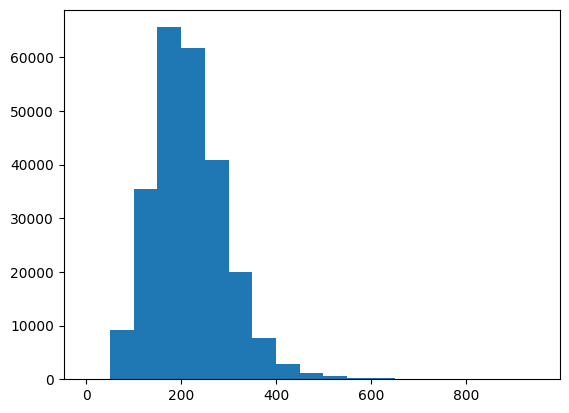

In [ ]:
plt.hist(flights['fare'], bins=np.arange(0, 1000, 50)); # Semicolon hides text output

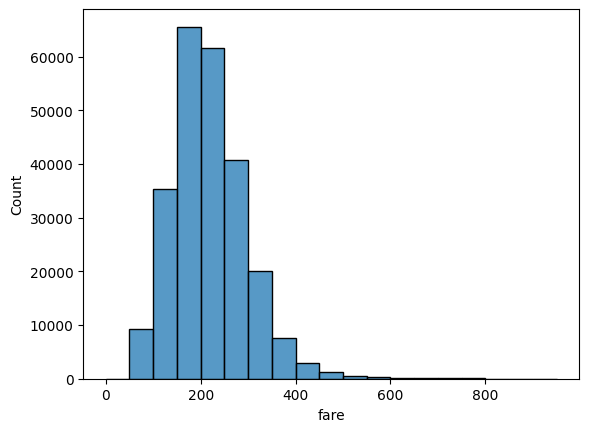

In [ ]:
sn.histplot(flights, x='fare', bins=np.arange(0, 1000, 50));

##### **Ex 1.5** Visualize the relationship between flight distance (`nsmiles`) and average fare for the full dataset. Repeat this step for only flights after 2020.

###### **Ans 1.5**

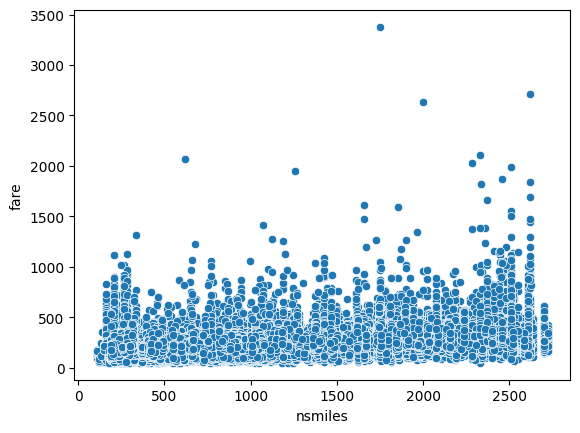

In [ ]:
sn.scatterplot(flights, x='nsmiles', y='fare');

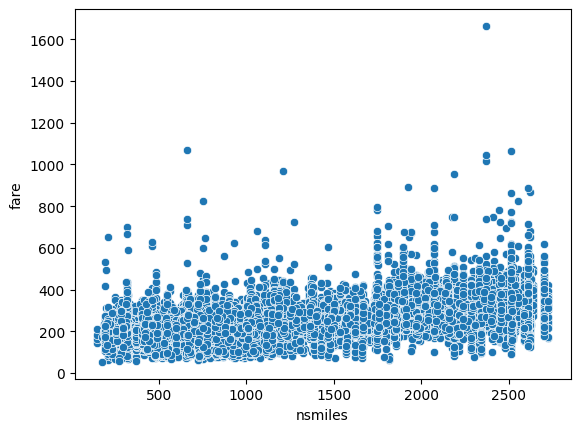

In [ ]:
sn.scatterplot(flights[flights['Year'] > 2020], x='nsmiles', y='fare');

We can quantify the strength of the _linear_ relationship between distance and fare by calculating the correlation coefficient ($r$-value) between the two variables. `np.corrcoef` returns the $r$-value in the top right and bottom left corners of the matrix.

In [ ]:
np.corrcoef(flights[flights['Year'] > 2020]['nsmiles'], flights[flights['Year'] > 2020]['fare'])

array([[1.        , 0.58913582],
       [0.58913582, 1.        ]])

## 2. Transforming the Data

**Data are messy.** In _almost_ all cases, the data you get is not in the final form you want it to be. So you will need to do some work to get your data into the shape you want it. After EDA, the likely next step in your ML workflow involves two components:
1. Data Cleaning
2. Data Transformation (e.g. Feature Extraction)

#### Cleaning Your Data

Often, the datasets you find or receive have missing cells. Leaving empty or `NaN` cells in your table may mess with calculations or cause errors. But how you deal with missing data is an important consideration. Some options:

1. Delete the row if some cell data for the row is missing.

2. Remove the column with missing data.

3. Treat the missing data as an exception.

4. Infer the missing data.

**Each of these options has its advantages and drawbacks, so you should consider them in the context of (1) your data, and (2) the task(s) you want to accomplish.**

##### **Ex 2.1** In our `flights` dataset, the geocode information for the airports is missing for some routes. Since we don't need that data, we can just drop the `Geocoded_City1` and `Geocoded_City2` columns.

_N.B. Be careful when mutating a dataframe. If you end up running the cell with the `drop` function twice, you'll encounter an error the second time. Whether you mutate or create newly-named dataframes is a matter of personal preference, just be careful._

###### **Ans 2.1**

In [ ]:
flights_no_geo = flights.drop(['Geocoded_City1', 'Geocoded_City2'], axis=1) # axis=1 specifies you want to drop columns, not rows

##### **Ex 2.2** One of the `nsmiles`, `passengers`, `fare`, and `fare_low` has "missing" data. Figure out which column has the missing data and deal with the column in one of the ways described above.

###### **Ans 2.2**

In [ ]:
# It doesn't make sense to have a negative number of passengers, so the -1's in the `passengers` column needs to be dealt with.
flights_no_missing_data = flights[flights['passengers'] > -1]

_N.B. the `fare_low` column has 1612 rows of `NaN`'s, which doesn't show up when doing `df.describe()` (and which I didn't catch at first). Another reason to be thorough when looking for missing data!_

#### Creating Features

**Feature extraction** is often another important task that needs to be completed before the data is ready to use in a ML pipeline. This involves 'extracting' or creating columns ('features') that provide the information you want to input into a learning algorithm. If your dataset already has the features you want, great! But more often than not, you'll want to modify or add columns to improve training. **Feature extraction is sometimes necessary to provide the 'context' that you implicitly know about the data, but that an algorithm does not.** For example, a house price estimator might need an additional column containing the population of the city the house is located in. Otherwise, the estimator can't differentiate between, for example, a 3-bedroom standalone house in Blacksburg and a 3-bedroom standalone house in Washington, D.C.  

##### **Ex 2.3** Create a new column called `fare_discount` that is the percent difference (discount) between the average fare for a route (`fare`) and the lowest fare for that route (`fare_low`). Find the route with the highest discount between average fare and lowest fare.

$$ \%_\text{diff} = \frac{\text{avg fare} - \text{low fare}}{\text{avg fare}}$$

###### **Ans 2.3**

In [ ]:
flights['fare_discount'] = (flights['fare'] - flights['fare_low']) / flights['fare']

In [ ]:
flights.sort_values('fare_discount', ascending=False)

,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,carrier_low,fare_low,Geocoded_City1,Geocoded_City2,fare_discount
122127,2001,1,"New York City, NY (Metropolitan Area)","Tampa, FL (Metropolitan Area)",13784,15304,NYC,TPA,1048,1,588.90,DL,DL,63.0,"New York City, NY (Metropolitan Area)\n(40.123...","Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",0.893021
83254,1997,1,"Chicago, IL","Phoenix, AZ",10986,14107,CHI,PHX,1445,1,787.17,TW,AA,86.7,"Chicago, IL\n(41.775002, -87.696388)","Phoenix, AZ\n(30.406931, -87.217578)",0.889859
166956,2013,2,"New York City, NY (Metropolitan Area)","Reno, NV",12197,14570,HPN,RNO,2443,1,550.00,AA,DL,75.0,"New York City, NY (Metropolitan Area)\n(40.123...","Reno, NV\n(30.177159, -95.162771)",0.863636
183731,2015,1,"New York City, NY (Metropolitan Area)","Washington, DC (Metropolitan Area)",15070,10821,SWF,BWI,249,1,341.51,US,AA,50.1,"New York City, NY (Metropolitan Area)\n(40.123...","Washington, DC (Metropolitan Area)\n(38.892062...",0.853299
17807,1999,2,"New York City, NY (Metropolitan Area)","San Diego, CA",13784,14679,NYC,SAN,2481,0,1059.95,TW,TW,158.8,"New York City, NY (Metropolitan Area)\n(40.123...","San Diego, CA\n(32.71576, -117.163817)",0.850182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244589,2024,1,"Boston, MA (Metropolitan Area)","New York City, NY (Metropolitan Area)",13296,12478,MHT,JFK,209,0,104.00,NaN,NaN,NaN,NaN,NaN,NaN
245312,2024,1,"New York City, NY (Metropolitan Area)","Syracuse, NY",12197,15096,HPN,SYR,222,0,120.30,NaN,NaN,NaN,NaN,NaN,NaN
245452,2024,1,"San Francisco, CA (Metropolitan Area)","Santa Barbara, CA",14831,14689,SJC,SBA,263,0,153.50,NaN,NaN,NaN,NaN,NaN,NaN
245595,2024,1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",12954,11618,LGB,EWR,2510,0,1065.00,NaN,NaN,NaN,NaN,NaN,NaN


New York to Tampa in 2001 had the highest discount for the low-cost flight at nearly 90%!

#### Joins

A common operation to perform while preparing your data for ML uses is joining data from two tables. This is especially useful when your main dataset does not provide all of the information you need about, for instance, a city or country.

In [ ]:
airlines = pd.read_csv('https://github.com/vt-ml-courses/cs5805-public/blob/main/python_for_ml_lab/airline_codes.csv?raw=true')
airlines.head()

,IATA Code,Airline
0,3M,Silver Airways
1,9K,Cape Air
2,AA,American Airlines
3,AQ,Aloha Airlines
4,AS,Alaska Airlines


##### **Ex 2.4** The `airline_codes.csv` file contains the 2-character [IATA codes](https://en.wikipedia.org/wiki/Airline_codes) referenced in the `carrier_lg` and `carrier_low` columns of the `flights` table, along with the corresponding airline name.

Join the two tables (use `carrier_lg` as the key on the `flights` table) and find the airline name of the carrier that flew the most passengers on a flight **to** Roanoke airport (airport code "ROA").

###### **Ans 2.4**

In [ ]:
flights_with_airlines = pd.merge(flights, airlines, left_on='carrier_lg', right_on='IATA Code')
flights_with_airlines.head()

,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,carrier_low,fare_low,Geocoded_City1,Geocoded_City2,fare_discount,IATA Code,Airline
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,G4,81.43,NaN,NaN,0.000000,G4,Allegiant Air
1,2021,3,"Pittsburgh, PA","Tampa, FL (Metropolitan Area)",14122,14112,PIT,PIE,878,80,90.03,G4,G4,90.03,NaN,NaN,0.000000,G4,Allegiant Air
2,2021,3,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,PIE,1138,84,93.44,G4,G4,93.44,NaN,NaN,0.000000,G4,Allegiant Air
3,2021,3,"Asheville, NC","New York City, NY (Metropolitan Area)",10431,11618,AVL,EWR,633,187,148.98,G4,G4,84.84,NaN,NaN,0.430528,G4,Allegiant Air
4,2021,3,"Asheville, NC","Miami, FL (Metropolitan Area)",10431,11697,AVL,FLL,677,262,109.95,G4,G4,93.91,NaN,NaN,0.145884,G4,Allegiant Air


In [ ]:
flights_with_airlines[flights_with_airlines['airport_2'] == 'ROA'].sort_values('passengers', ascending=False).head()

,Year,quarter,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,carrier_low,fare_low,Geocoded_City1,Geocoded_City2,fare_discount,IATA Code,Airline
241081,1996,2,"New York City, NY (Metropolitan Area)","Roanoke, VA",11618,14574,EWR,ROA,440,70,197.84,RU,RU,191.40,"New York City, NY (Metropolitan Area)\n(40.123...","Roanoke, VA\n(37.747827, -80.470248)",0.032552,RU,Britt Airways
204899,1993,3,"New York City, NY (Metropolitan Area)","Roanoke, VA",11618,14574,EWR,ROA,440,48,160.24,US,NW,158.73,"New York City, NY (Metropolitan Area)\n(40.123...","Roanoke, VA\n(37.747827, -80.470248)",0.009423,US,US Airways
208019,1996,2,"New York City, NY (Metropolitan Area)","Roanoke, VA",12953,14574,LGA,ROA,440,48,180.30,US,DL,127.06,"New York City, NY (Metropolitan Area)\n(40.123...","Roanoke, VA\n(37.747827, -80.470248)",0.295286,US,US Airways
190844,1993,3,"New York City, NY (Metropolitan Area)","Roanoke, VA",12953,14574,LGA,ROA,440,46,131.24,US,NW,107.60,"New York City, NY (Metropolitan Area)\n(40.123...","Roanoke, VA\n(37.747827, -80.470248)",0.180128,US,US Airways
235124,1993,4,"New York City, NY (Metropolitan Area)","Roanoke, VA",11618,14574,EWR,ROA,440,46,161.61,NW,NW,156.15,"New York City, NY (Metropolitan Area)\n(40.123...","Roanoke, VA\n(37.747827, -80.470248)",0.033785,NW,Northwest Airlines


[Britt Airways](https://en.wikipedia.org/wiki/Britt_Airways) flew 70 passengers from Newark (EWR) to Roanoke in 1996.

## General Tips

Here are some general tips that might be helpful in completing the assignments this semester:

* Use Python classes when you implement a particular classifier, regressor, etc. A Python class is easy to set up and can help you organize multiple related functions and keep track of important values with a single object.
```
class LinearRegressor():
    def __init__(self):
        ...
    def fit(X, y):
        ...
    def predict(x):
        ...
```

* Python variable assignment has a few shortcuts:
```
# Increment a variable (also works for -=, *=)
x += 1
# Assign multiple variables at the same time
x, y, z = (1.5, -3.5, 4.0) # useful when a function returns multiple values
```

* Use `zip` to keep track of two values in a for loop:
```
for x, y in zip(x_vals, y_vals):
    ...
```

* `int(True)` returns 1 and `int(False)` returns 0 (`True` and `False` must be capitalized to be used as boolean values)

* Reduce log output to regular intervals using the modulo (`%`) operator:
```
if epoch % 50 == 0:
    print output
```

* `dir()` shows the contents (methods, attributes) of an object

* `func?` shows documentation for the function

In [ ]:
np.append?


## Helpful Stuff

### [Python](https://docs.python.org/3/)

| Feature | Use | Note | Example |
| ---| --- | --- | --- |
| Scientific Notation | `1.2e10` | Python natively supports `e` as a keyword for scientific notation. | |
| String Splitting | `str.split(delim)` | Splits a string into an array of substrings based on a delimiter. | `'Hello, James'.split(',')` returns `['Hello', ' James']` |
| Joining Strings | `delim.join(lst)` | Joins an iterable (list, array) of substrings together with a delimiter in between. | `"#".join(['Apples', 'Bananas', 'Oranges'])` returns `'Apples#Bananas#Oranges'` |


### [Pandas](https://pandas.pydata.org/docs/)

| Feature | Use | Note | Example |
| --- | --- | --- | --- |
| Dropping | `df.drop(names_or_idx, axis)` | Drop (remove) row(s)/column(s) from a dataframe (by default, copies the df). <br> `axis=0` looks to drop rows, while `axis=1` looks to drop columns.| `df.drop('col1', axis=1)` returns `df` without the `col1` column. <br> `df.drop('col1')` causes an error because there is no row with the index `col1`. |
| Selecting Rows | `df[cond]` | Filter the dataframe to rows where a condition is met (see [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)). <br> `cond` should be a list of booleans indicating whether each row should be selected. | `df[df['col1'] > 10]` returns only the rows in `df` where the `col1` <br> value is greater than 10. |

### [Numpy](https://numpy.org/doc/2.0/)

| Feature | Use | Note | Example |
| --- | --- | --- | --- |
| Axis | `np.fn(..., axis=0, ...)` | Specifies which direction to apply the function. <br> For numpy, `axis=0` applies to each column and `axis=1` applies to each row. | For `a = np.array([[2,3],[4,5]])`, <br> `a.mean(axis=0)` returns `[3,4]`, `a.mean(axis=1)` returns `[2.5, 4.5]`, <br> and `a.mean()` returns `3.5` |
| Random | `np.random...` | There are a variety of random number generators available from the `np.random` module. <br> Consult the [documentation](https://numpy.org/doc/stable/reference/random/index.html) for details. | `np.random.choice([2,3], size=10)` returns an array of 10 randomly <br> sampled values from the list, in this case either 2 or 3. |
| Stacking | `np.hstack(arr_list)`, `np.vstack(arr_list)` | Stacks (appends) arrays either horizontally or vertically. | For `a = np.array([[1,2],[3,4]])` and `b = np.array([5,6],[7,8]])`, <br>`np.hstack([a,b])` returns `[[1,2,5,6],[3,4,7,8]]` <br> and `np.vstack([a,b])` returns `[[1,2],[3,4],[5,6],[7,8]]`. |
| Ones/Zeros | `np.ones((m,n))`, `np.zeros(n)` | Creates an array of ones/zeros of the specified shape. | `np.ones((2,3))` returns `array([[1., 1., 1.],[1., 1., 1.]])` and <br> `np.zeros(4)` returns `array([0., 0., 0., 0.])` |


### [Scikit-Learn](https://scikit-learn.org/stable/user_guide.html)

The following methods work for _many_ `sklearn` ML models:

| Method | Note |
| --- | --- |
|`model.fit(X, y)` | Train the model using training input matrix `X` and labels/targets `y`. |
|`model.predict(X)` | After training, test the model with new input data `X`. Will return the model's predictions for each row in `X`. |
| `model.get_params()` | Returns model parameters. |
| `model.score(X, y)` | Returns the $R^2$ coefficient of determination for the predictions using `X` (checked against ground-truth `y`). |